In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge

import functions as mp
from joblib import Parallel, delayed

import importlib
importlib.reload(mp) # reloads package after changes have been made

<module 'functions' from '/Users/quanle/feature_interactions/functions.py'>

In [3]:
M = 10 
N = 1000
K = 0
J1 = 0
J2 = 1

SNR = np.linspace(0, 5, 10)

n_ratio = np.sqrt(N) / N
m_ratio = np.sqrt(M) / M

B = 1000
num_trials = 1
models = [
    KernelRidge(alpha=.001, kernel="rbf")
]

In [4]:
model_names = [model.__class__.__name__ if model.__class__.__name__ != KernelRidge.__name__ 
               else model.__class__.__name__ + " " + model.get_params()["kernel"]
               for model in models]

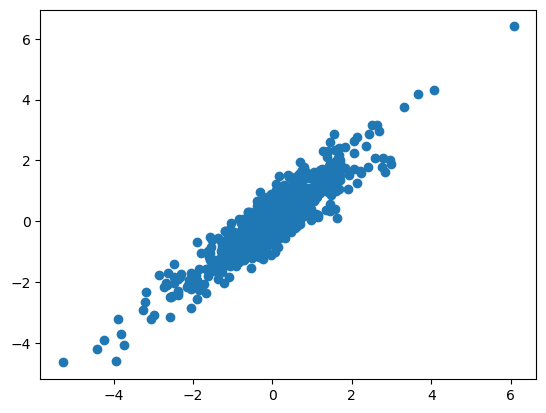

In [9]:
def compute_trial(X, Y, n_ratio, m_ratio, B, model, J1, J2, metric):
    ensemble = mp.Ensemble(model).fit(X, Y, n_ratio, m_ratio, B)
    predictions = ensemble.predict(X)

    # plt.figure()
    # plt.scatter(X[:, J1] * X[:, J2], predictions)

def trial(M, N, K, n_ratio, m_ratio, B, model, J1, J2, snr):
    X, Y = mp.kSparseLinearModel(N, M, K)
    Y += snr * (X[:, J1] * X[:, J2])
    Y += X[:, 0] + X[:, 1] + X[:, 2] + X[:, 4] + X[:, 5]
    Y = (Y - np.mean(Y)) / np.std(Y)
    plt.scatter(X[:, J1] * X[:, J2], Y)
    return compute_trial(X, Y, n_ratio, m_ratio, B, model, J1, J2, np.abs) 
    

trial(M, N, K, n_ratio, m_ratio, B, models[0], J1, J2, 5)
plt.show()

In [6]:
def partial_dependence(X, model, S):
    N, M = X.shape
    pd = np.empty(N)
    for i, x in enumerate(X):
        copy = X.copy()
        copy[:, S] = x[S]
        pd[i] = np.mean(model.predict(copy))
    return pd